ALL IMPORTS ARE BEING STORED HERE .

In [290]:
from sklearn.datasets import fetch_kddcup99 
from sklearn.random_projection import johnson_lindenstrauss_min_dim 
from sklearn.random_projection import SparseRandomProjection , GaussianRandomProjection
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

2. We will use random projection on the KDD Cup dataset. Fetch this dataset from
sklearn using the following command in your python code from sklearn.datasets import fetch kddcup99. Compute the number of sam-
ples as n and number of features as d from the data (i.e., D ∈ Rn×d).

In [291]:
data = fetch_kddcup99(as_frame = True) ;

Data = data.frame ; # this will give me the data in the form of a pandas dataframe . 

target = data.target # the last column is the target variable .

Data = Data.iloc[: ,:-1] # getting only the features and not the target variable . 

n , d = Data.shape ; 

print(f"The number of samples is {n} and the number of features is {d}") ; 

The number of samples is 494021 and the number of features is 41


Thus we have 494021 datapoints with the number of features as 41 . 

(a) Define a family of JL matrices of size d × 20. Let matrix M ∈ Rd×20 be a

uniformly random sample from the family. Notice that M is a linear transfor-
mation that maps a vector from R^d
to R^20. Compute a mapping of every point
in D as E = DM and compute k-means clustering, using k = 15. Let A be
the centroids of DM and B be the centroids of D. Compaute the loss of the
k-means clusteiring on D using A and B respectively. Repeat this experiment
5 times for each random matrix M. Present your result in a table or bar graph.

we take the matrix with enteries from the gaussian distribution of mean 0 and variance 1/root(k)

First let's see the datatype of all the columns in this dataframe . 

In [292]:

# categorical_columns = Data.select_dtypes(include = ['object']).columns ; 
# numerical_columns = Data.select_dtypes(include = ['number']).columns ; 


print(Data.dtypes) ; 

print(target.head()) ;  

print(target.unique())

duration                       object
protocol_type                  object
service                        object
flag                           object
src_bytes                      object
dst_bytes                      object
land                           object
wrong_fragment                 object
urgent                         object
hot                            object
num_failed_logins              object
logged_in                      object
num_compromised                object
root_shell                     object
su_attempted                   object
num_root                       object
num_file_creations             object
num_shells                     object
num_access_files               object
num_outbound_cmds              object
is_host_login                  object
is_guest_login                 object
count                          object
srv_count                      object
serror_rate                    object
srv_serror_rate                object
rerror_rate 

In [293]:
# for column in Data.columns : 
#     print(f"The number of unique values in the column {column} is {Data[column].nunique()}") ; 
    
# for column in Data.columns :
#     print(f"{column}: {Data[column].unique()[:5]}") 

for column in Data.columns : 
  try: 
    Data[column] = pd.to_numeric(Data[column]) ; 
    
    print(f"The column {column} is numerical") ; 
  
  except: 
    print(f"The column {column} is categorical") ; 

The column duration is numerical
The column protocol_type is categorical
The column service is categorical
The column flag is categorical
The column src_bytes is numerical
The column dst_bytes is numerical
The column land is numerical
The column wrong_fragment is numerical
The column urgent is numerical
The column hot is numerical
The column num_failed_logins is numerical
The column logged_in is numerical
The column num_compromised is numerical
The column root_shell is numerical
The column su_attempted is numerical
The column num_root is numerical
The column num_file_creations is numerical
The column num_shells is numerical
The column num_access_files is numerical
The column num_outbound_cmds is numerical
The column is_host_login is numerical
The column is_guest_login is numerical
The column count is numerical
The column srv_count is numerical
The column serror_rate is numerical
The column srv_serror_rate is numerical
The column rerror_rate is numerical
The column srv_rerror_rate is nu

Thus we have 3 categorical columns and rest are numerical columns . 

Now we can get the jl matrices from here after changing the categorical columns to the encodings . 

In [294]:
# now in the data , we have byte strings and categorical features , we need to convert them to numerical values . 

categorical_columns = Data.select_dtypes(include = ['object']).columns ; 
numerical_columns = Data.select_dtypes(include = ['number']).columns ; 

label_encoders = {} ; 

for column in categorical_columns: 
  label_enc = LabelEncoder() ; 
  
  Data[column] = label_enc.fit_transform(Data[column]) ; 
  
  label_encoders[column] = label_enc ; 
  

Data = Data.to_numpy(dtype=float) ;  

def get_jl_matrix(d , m): 
  
  return np.random.normal(0 , 1/np.sqrt(m) , (d , m)) ; 

def get_E(D , M): 
  
  print(D.shape) ; 
  print(M.shape) ; 
  D = np.array(D, dtype=np.float64)
  M = np.array(M, dtype=np.float64)
  return np.dot(D , M) ; 


M = get_jl_matrix(d , 20) ; 

E = get_E(Data , M) ; 

# thus we get the matrix E with the following dimensions . 

print(E.shape) ; 

(494021, 41)
(41, 20)
(494021, 20)


NOW WE NEED TO COMPUTE K MEAN CLUSTERING USING K = 15 . Let A be
the centroids of DM and B be the centroids of D. Compaute the loss of the
k-means clusteiring on D using A and B respectively.

Reducing the number of dimensions from 41 to 20
Running iteration 0
(494021, 41)
(41, 20)
(20, 41)
(494021, 15)
(494021, 15)
Running iteration 1
(494021, 41)
(41, 20)
(20, 41)
(494021, 15)
(494021, 15)
Running iteration 2
(494021, 41)
(41, 20)
(20, 41)
(494021, 15)
(494021, 15)
Running iteration 3
(494021, 41)
(41, 20)
(20, 41)
(494021, 15)
(494021, 15)
Running iteration 4
(494021, 41)
(41, 20)
(20, 41)
(494021, 15)
(494021, 15)

Experiment Results Table is as follows :
Experiment | Loss on D (original) | Loss on DM (reduced)
     1     |    3228505318238.99         |    293451776500234112.00
     2     |    3228505318238.99         |    256902935661191040.00
     3     |    3228505318238.99         |    171704445693905152.00
     4     |    3228505318238.99         |    283168166439215264.00
     5     |    3228505318238.99         |    204274931877030464.00


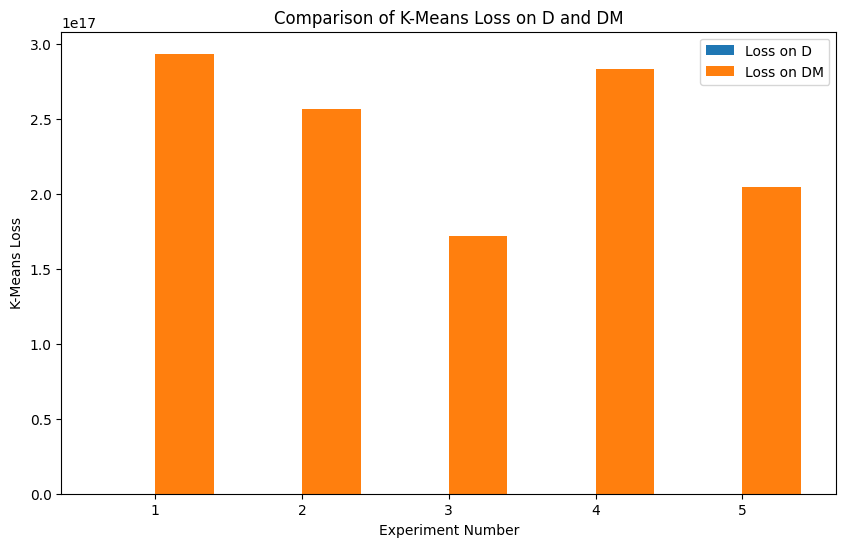

In [302]:
k = 15  
number_of_iterations = 5 
d = Data.shape[1] ; # number of dimensions in the data . 
m = 20 # reduced number of dimensions . 

print(f"Reducing the number of dimensions from {d} to {m}") ;

losses_D = [] ; 
losses_E = [] ; 

def get_centroids(data , k): 
  
  k_means_clus = KMeans(n_clusters=k , random_state=42 ,  n_init=10) ; 
  k_means_clus.fit(data) ; 
  centroids = k_means_clus.cluster_centers_ ; 
  
  return centroids ; 

def get_loss(data , centroids): 
  
  distances = np.linalg.norm(data[: , None] - centroids , axis=2) ; 
  
  # print(distances.shape) ; 
  nearest_distances = np.min(distances , axis=1) ; 
  
  loss = np.sum(nearest_distances ** 2) ; 
  
  return loss ;  

  
for iteration in range(number_of_iterations): 
  
  print(f"Running iteration {iteration}") ; 
  
  M = get_jl_matrix(d , m) ; 
  
  E = get_E(Data , M) ; 
  
  centroids_D = get_centroids(Data , k) ; 
  centroids_E = get_centroids(E , k) ; 
  
  M_pseudo_inverse = np.linalg.pinv(M) ; 
  print(M_pseudo_inverse.shape) ; 
  
  centroids_E_transformed = np.dot(centroids_E , M_pseudo_inverse) ; 
    
  loss_D_on_D = get_loss(Data , centroids_D) ; 
  loss_E_on_D = get_loss(Data , centroids_E_transformed) ; 
  
  losses_D.append(loss_D_on_D) ; 
  losses_E.append(loss_E_on_D) ; 
  

print("\nExperiment Results Table is as follows :")
print("Experiment | Loss on D (original) | Loss on DM (reduced)")
for i, (ld, ldm) in enumerate(zip(losses_D, losses_E)):
    print(f"     {i+1}     |    {ld:.2f}         |    {ldm:.2f}")

# Plot the Results
experiments = np.arange(1, number_of_iterations + 1)
plt.figure(figsize=(10, 6))
plt.bar(experiments - 0.2, losses_D, width=0.4, label='Loss on D')
plt.bar(experiments + 0.2, losses_E, width=0.4, label='Loss on DM')
plt.xlabel('Experiment Number')
plt.ylabel('K-Means Loss')
plt.title('Comparison of K-Means Loss on D and DM')
plt.legend()
plt.show()

Thus , we can see the difference between the losses in both the cases . The loss due to DM is a lot higher than the loss due to D . This is due to loss of data during data dimension reduction . 

b) We will run a linear regression on the dataset. Consider the label feature as
the target/response as y. It has 23 classes. Define a family of JL matrices of
size 10 × n. Notice that the matrix-matrix between a sample from the JL
family and D could be very expensive. So, you may use a sparse JL matrix
as shown in the class. Let matrix M ∈ R10d×n be a uniformly random sample
from the sparse JL family. Compute E = MD and z = My and solve linear
regression on (E, z). Also, solve the linear regression on (D,y). Let a be the
solution of (E, z) and b be the solution of (D,y). Compute the loss of the
linear regression on (D,y) using a and b, respectively. Repeat this experiment
5 times for each random matrix M. Present your result in a table or bar graph.

Lets see the number of classes in the target . 

In [296]:
print(len(target.unique())) ; 

23


NOW LETS GET THE JL MATRIX OF SIZE 10d * n  

Changing the target to label encoding

In [297]:
M = get_jl_matrix(10*d , n) ; 

# print(M.shape) ; 

# print(Data.shape) ; 
E = get_E(M , Data) ; 

print(E.shape) ; # thus we get matrix E of size 10*d x d . 

label_enc = LabelEncoder() ; 

target_numeric = label_enc.fit_transform(target) ; 

target_numeric = target_numeric.reshape(-1 , 1) ; # this reshapes the target variable to a column vector . 


Z = get_E(M , target_numeric) ; # the target was the y . 

print(Z.shape) ; # thus we get the matrix Z of size 10*d x 1 . 

(410, 494021)
(494021, 41)
(410, 41)
(410, 494021)
(494021, 1)
(410, 1)


NOW SOLVING LINEAR REGRESSION ON (E , z) . 

In [298]:
model_E_Z = LinearRegression() ; 
model_E_Z.fit(E , Z) ; 

predictions_E = model_E_Z.predict(E) ; 

# mse = mean_squared_error(Z, predictions_E)

# print(f"The mean squared error is {mse}") ; 

NOW SOLVING LINEAR REGRESSION ON (D , y) . 

In [299]:
print(target_numeric.shape)

model_D_y = LinearRegression() ; 
model_D_y.fit(Data , target_numeric) ; 
predictions_D = model_D_y.predict(Data) ; 
print(target_numeric[0:13])  ; 
print(predictions_D[0:13]) ;  
print(predictions_D.shape) ; 
# mse = mean_squared_error(target_numeric, predictions_D)

# print(f"The mean squared error is {mse}") ; 

(494021, 1)
[[11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]]
[[11.06578235]
 [10.98030408]
 [10.9471758 ]
 [10.90964636]
 [10.88724356]
 [10.87477528]
 [11.46356578]
 [10.79142436]
 [10.86592164]
 [10.68309036]
 [10.8578625 ]
 [10.67300258]
 [10.77310671]]
(494021, 1)


NOW WE NEED TO COMPUTE THE LOSS OF THE LINEAR REGRESSION ON (D , y) using a and b , respectively . 

In [300]:
predictions_model_E_Z = model_E_Z.predict(Data) ; 
predictions_model_D_y = model_D_y.predict(Data) ; 

mse_E_Z = mean_squared_error(target_numeric , predictions_model_E_Z) ; 
mse_D_y = mean_squared_error(target_numeric , predictions_model_D_y) ; 

print(f"The mean squared error for the model E_Z is {mse_E_Z} and for the model D_y is {mse_D_y}") ; 

The mean squared error for the model E_Z is 0.9385743732214502 and for the model D_y is 0.824035824598291


NOW WE NEED TO DO THE ABOVE THING 5 times for each random matrix M. Present your result in a table or bar graph. 

(410, 494021)
(494021, 41)
(410, 494021)
(494021, 1)
(410, 494021)
(494021, 41)
(410, 494021)
(494021, 1)
(410, 494021)
(494021, 41)
(410, 494021)
(494021, 1)
(410, 494021)
(494021, 41)
(410, 494021)
(494021, 1)
(410, 494021)
(494021, 41)
(410, 494021)
(494021, 1)

Experiment Results Table is as follows :
Experiment | Loss on E_Z | Loss on D_y
     1     |    0.95         |    0.82
     2     |    0.97         |    0.82
     3     |    0.91         |    0.82
     4     |    0.94         |    0.82
     5     |    0.92         |    0.82


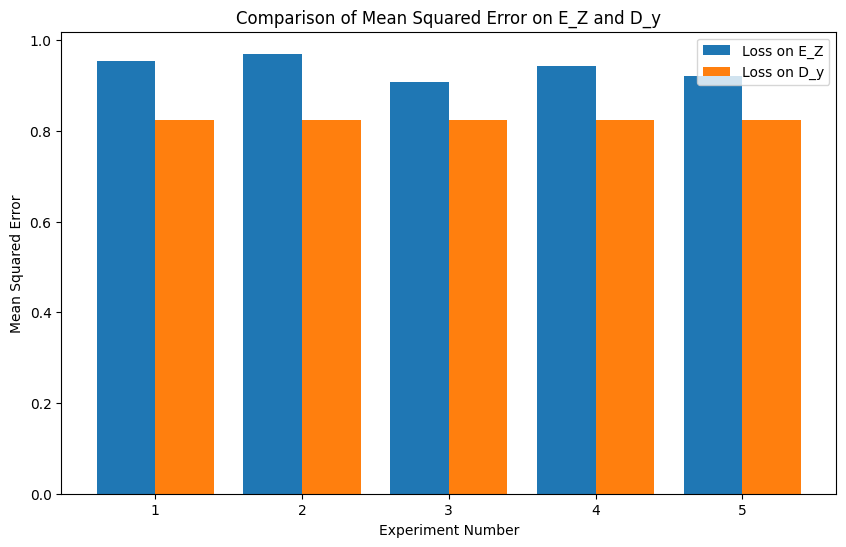

In [301]:
losses_model_E_Z = [] ; 
losses_model_D_y = [] ; 

number_of_iterations = 5 ; 

for iteration in range(number_of_iterations): 
  M = get_jl_matrix(10*d , n) ;  
  E = get_E(M , Data) ; 
  Z = get_E(M , target_numeric) ; 
  model_E_Z = LinearRegression() ; 
  model_E_Z.fit(E , Z) ; 
  predictions_model_E_Z = model_E_Z.predict(Data) ;  
  mse = mean_squared_error(target_numeric , predictions_model_E_Z) ; 
  losses_model_E_Z.append(mse) ;
  
  model_D_y = LinearRegression() ;
  model_D_y.fit(Data , target_numeric) ; 
  predictions_model_D_y = model_D_y.predict(Data) ; 
  mse = mean_squared_error(target_numeric , predictions_model_D_y) ; 
  losses_model_D_y.append(mse) ; 
  
print("\nExperiment Results Table is as follows :")
print("Experiment | Loss on E_Z | Loss on D_y")
for i, (le, ld) in enumerate(zip(losses_model_E_Z, losses_model_D_y)):
    print(f"     {i+1}     |    {le:.2f}         |    {ld:.2f}")
    
# we are also plotting the results . 

experiments = np.arange(1, number_of_iterations + 1)
plt.figure(figsize=(10, 6))
plt.bar(experiments - 0.2, losses_model_E_Z, width=0.4, label='Loss on E_Z')
plt.bar(experiments + 0.2, losses_model_D_y, width=0.4, label='Loss on D_y')
plt.xlabel('Experiment Number')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error on E_Z and D_y')
plt.legend()
plt.show()
